# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.104270e+01     8.059153e+00
 * time: 0.004077911376953125
     1     3.003896e+01     5.348022e+00
 * time: 0.018867015838623047
     2     2.349571e+01     7.838129e+00
 * time: 0.03716397285461426
     3     2.129187e+01     9.794851e+00
 * time: 0.05562710762023926
     4     2.080821e+01     1.104039e+01
 * time: 0.07443809509277344
     5     1.992927e+01     1.093628e+01
 * time: 0.09341096878051758
     6     1.637701e+01     9.603507e+00
 * time: 0.11225700378417969
     7     1.089466e+01     3.535144e+00
 * time: 0.13120102882385254
     8     9.823381e+00     2.146759e+00
 * time: 0.1462719440460205
     9     9.241833e+00     1.092492e+00
 * time: 0.16163897514343262
    10     8.971123e+00     8.668413e-01
 * time: 0.17753005027770996
    11     8.931517e+00     1.884723e+00
 * time: 0.18956398963928223
    12     8.781298e+00     1.329587e+00
 * time: 0.20155692100524902
    13     8.671630e+00     8.223375e-01
 * time

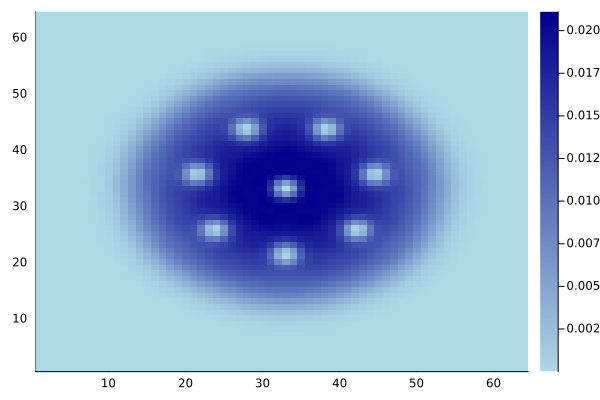

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)